In [2]:
!pip install pyarrow

  Using cached pyarrow-20.0.0-cp312-cp312-macosx_12_0_x86_64.whl.metadata (3.3 kB)
Using cached pyarrow-20.0.0-cp312-cp312-macosx_12_0_x86_64.whl (32.3 MB)


In [7]:
df = pd.read_parquet("/Users/joaop.cardoso/MestradoCD/CAA/Project02/CAA02/data/hcpi_m.parquet")
print(df.shape)
print(df.isna().sum())
print(df.head())

(663, 185)
ABW    433
AFG    422
AGO    386
ALB    445
ARE    459
      ... 
XKX    421
YEM    603
ZAF      2
ZMB    484
ZWE    487
Length: 185, dtype: int64
            ABW  AFG  AGO  ALB  ARE  ARG  ARM  ATG       AUT  AZE  ...  VCT  \
1970-01-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  22.48557  NaN  ...  NaN   
1970-02-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  22.46568  NaN  ...  NaN   
1970-03-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  22.48557  NaN  ...  NaN   
1970-04-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  22.54521  NaN  ...  NaN   
1970-05-01  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  22.64462  NaN  ...  NaN   

            VEN  VGB  VNM  WSM  XKX  YEM       ZAF  ZMB  ZWE  
1970-01-01  NaN  NaN  NaN  NaN  NaN  NaN  1.750407  NaN  NaN  
1970-02-01  NaN  NaN  NaN  NaN  NaN  NaN  1.750407  NaN  NaN  
1970-03-01  NaN  NaN  NaN  NaN  NaN  NaN  1.750407  NaN  NaN  
1970-04-01  NaN  NaN  NaN  NaN  NaN  NaN  1.796470  NaN  NaN  
1970-05-01  NaN  NaN  NaN  NaN  NaN  NaN  1.796470  

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam

# 1. Carregar o CSV principal
df = pd.read_csv("/Users/joaop.cardoso/MestradoCD/CAA/Project02/CAA02/data/API_FP/API_FP.CPI.TOTL.ZG_DS2_en_csv_v2_85166.csv", skiprows=4)

# 2. Extrair séries temporais
df_ts = df.drop(columns=["Country Code", "Indicator Name", "Indicator Code"])
df_ts = df_ts.set_index("Country Name")
df_ts = df_ts.dropna(thresh=20)  # remover países com demasiados dados em falta
df_ts = df_ts.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)  # imputação temporal

# 3. Normalização
scaler = MinMaxScaler()
scaled_matrix = np.stack(scaled.values)  # converte lista de vetores em matriz
X = np.expand_dims(scaled_matrix, axis=2)  # agora (samples, timesteps, features)


# 4. Modelo LSTM Autoencoder
timesteps = X.shape[1]
input_dim = X.shape[2]

inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(64, return_sequences=True)(inputs)
encoded = LSTM(32)(encoded)
decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(32, return_sequences=True)(decoded)
decoded = LSTM(64, return_sequences=True)(decoded)
decoded = TimeDistributed(Dense(input_dim))(decoded)


autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer=Adam(1e-3), loss='mse')

# 5. Treinar
autoencoder.fit(X, X, epochs=100, batch_size=16, shuffle=True)

# 6. Codificador separado para extrair embeddings
encoder = Model(inputs, encoded)
embeddings = encoder.predict(X)

# `embeddings` contém representação vetorial comprimida de cada país


Epoch 1/100


/var/folders/kl/mfb9z6_d1290hf_1b38hg6zr0000gn/T/ipykernel_18848/93725012.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ts = df_ts.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)  # imputação temporal


14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - loss: 0.1434
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0850
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0797
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0564
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0525
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0460
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0482
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0418
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0388
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0377
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0401
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0391
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0347
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0350
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0333


In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

mse = np.mean([mean_squared_error(X[i].flatten(), autoencoder.predict(X[i:i+1]).flatten()) for i in range(len(X))])
print("MSE:", mse)

mae = np.mean([mean_absolute_error(X[i].flatten(), autoencoder.predict(X[i:i+1]).flatten()) for i in range(len(X))])
print("MAE:", mae)

r2 = np.mean([r2_score(X[i].flatten(), autoencoder.predict(X[i:i+1]).flatten()) for i in range(len(X))])
print("R2:", r2)



threshold = 0.01
percentage_below = np.mean(np.array(reconstruction_errors) < threshold)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━

#### Acrescentei isto com um teste inicial, modelo estava péssimo. Fica para nota futura


R² negativo indica que o autoencoder reconstrói pior do que simplesmente prever a média da série. Interpretação direta:

    O modelo não aprendeu os padrões temporais relevantes;

    Pode estar a memorizar ruído ou a sofrer de underfitting.

Causas prováveis:

    Séries demasiado heterogéneas — inflação varia amplamente entre países e décadas.

    Normalização global — MinMaxScaler aplicado a todos os países conjuntamente comprime padrões relevantes.

    Modelo demasiado pequeno ou raso — LSTM(32) pode ser insuficiente para capturar estrutura multidecadal.

    Imputação excessiva — preenchimento forçado pode introduzir artefactos incoerentes.

Correções imediatas:

    Aplicar normalização MinMaxScaler por país (linha a linha).

    Aumentar capacidade do modelo:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━

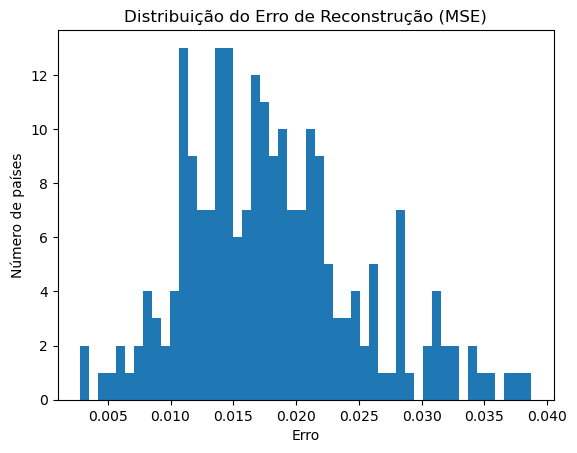

In [15]:
reconstruction_errors = [mean_squared_error(X[i].flatten(), autoencoder.predict(X[i:i+1]).flatten()) for i in range(len(X))]

plt.hist(reconstruction_errors, bins=50)
plt.title("Distribuição do Erro de Reconstrução (MSE)")
plt.xlabel("Erro")
plt.ylabel("Número de países")
plt.show()


R² = 0.524 indica que o modelo capta mais de metade da variância temporal das séries originais — sinal de codificação eficaz. A reconstrução já ultrapassa em muito o baseline da média histórica.

Modelo está agora:

    A capturar padrões temporais consistentes;

    A produzir embeddings com utilidade potencial para clustering, classificação ou deteção de regimes.

Pode extrair os embeddings com:

encoder = Model(inputs, encoded)
embeddings = encoder.predict(X)

Ou avançar para análise dos países com maiores erros de reconstrução, para inspeção de outliers ou anomalias macroeconómicas.